# `dsolve` examples

The objective of `dsolve` is to be easy to use. The system requires a list of strings written in $\LaTeX$, a dictionary of parameters with numerical values used in the calibration, and the specification of the state variables `x`, the forward-looking variables `p`, and the shocks `z`. 

Once the system is initialized and solved, `simulate_path` computes the path of endogenous variables given a sequence of unpredicted shocks `z` and a initial state `x0`.

In [1]:
from dsolve.solvers import Klein
from dsolve.atoms import Variable, Parameter
import numpy as np
import matplotlib.pyplot as plt

### Variables in `dsolve`

A variable in `dsolve` is any symbol that depends on `t`, with the possibility of having an expected value operator. There are many ways to flexibly reference to the same variable as the following example shows.

In [2]:
print(Variable('E_{t}[\pi^{w}_{t+1}]'))
print(Variable('E\pi^w_{t+1}'))
print(Variable('E_t\pi_{t+1}^w'))
print(Variable('E[\pi_{t+1}^w]'))
Variable('E_{t}[\pi^{w}_{t+1}]').sympy

E_{t}[\pi^{w}_{t+1}]
E_{t}[\pi^{w}_{t+1}]
E_{t}[\pi^{w}_{t+1}]
E_{t}[\pi^{w}_{t+1}]


E_{t}[\pi^{w}_{t+1}]

### AR(1)

The simples example is an $AR(1)$ process. Since it has no forward-looking variables, `p` does not need to be specified. 
$$x_t=\rho x_{t-1}+\sigma\epsilon_t$$
$x_{-1}=0, \epsilon_0=1, \epsilon_t=0\ \text{for}\ t>0$

In [3]:
eq = ['x_{t}=\rho*x_{t-1}+\sigma*eps_{t}']  # define the law of motion of x_t

calibration = {'\rho':0.8,'\sigma':1}      # give numerical values to parameters.

system = Klein(eq, x='x_{t-1}', z='eps_{t}', calibration=calibration)
system.simulate(x0 = 0, z = {'eps_{0}':1}, T=12)
#mit_shock = system.simulate(x0 = 0, z = {'eps_{0}':1}, T=12)
#mit_shock = system.simulate(x0 = 0, z = {'eps_{t}':np.array([1.,0,0,0,0,0,0,0,0,0,0])})

#mit_shock.plot('x_{t-1}')

### 2 equations NK model

$$\pi_t=\beta E[\pi_{t+1}]+\kappa y_{t}+u_t$$
$$y_t=E[y_{t+1}]+(1-\phi)E[\pi_{t+1}]+u_t$$

In [4]:
eq=[
    '\pi_{t}=\beta*E\pi_{t+1}+\kappa*y_{t}+u_{t}',
    'y_{t}=Ey_{t+1}+(1-\phi)*E[\pi_{t+1}]+\epsilon_{t}',
    '\epsilon_{t} = \rho_v*\epsilon_{t-1}+v_{t}'
]
calibration = {'\beta':0.98,'\kappa':0.1,'\phi':1.1,'\rho_v':0.8}
system = Klein(eq, x='\epsilon_{t-1}', p='\pi_{t},y_{t}', z='v_{t},u_{t}', calibration=calibration)
d = system.simulate(x0=0, z = {'v_{0}':1}, T=12)
#mit_shock = system.simulate(x0=0, z = {'v_{0}':1}, T=12)
#mit_shock .plot('\pi_{t}, y_t, \epsilon_{t-1}')

### Test with static equations

`dsolve` also handles static equations. In order to reduce the size of the system, those can be specified using the `s` argument. Equations that define static variables must be written with the `s` variable in the left hand side.

Prior to solving the system, `dsolve` will substitute the variables in `s` into the other equations. If `s` is not specified and the system contains static variables, or is not easy to express them, `dsolve` will also solve the system but the matrices will be bigger. 

C:\Users\MBBar\AppData\Local\Temp\ipykernel_23320\3878760137.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


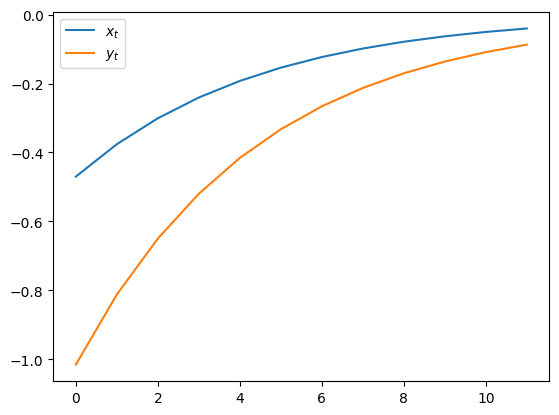

In [5]:
eq=[
    'x_{t}=b*Ex_{t+1}+kappa*y_{t}',
    'y_{t}=Ey_{t+1}-(i_t-x_{t}+rho)',
    'v_t = rho_v*v_{t-1}+eps_t',
    'i_t=rho+phi*x_{t}+v_t'  # static equation, written in the form i_t=.... and specified by s='i_t'
]
calibration = {'b':0.98,'kappa':0.1,'phi':1.1,'rho_v':0.8, 'rho':0.02}
system = Klein(eq, x='v_{t-1}', p='x_t,y_t', z='eps_t', s='i_t', calibration=calibration)
d = system.simulate(x0=0, z = {'eps_{0}':0.25},T=12)
#mit_shock.plot('x_{t}, y_t')
#system.equations.static.calibrated[0].subs({'v_{t}':d['v_{t}'][1]})
fig,ax = plt.subplots()
system.plot(ax,d,vars='x_t, y_t')
ax.legend()
fig.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


{'eps_{t}': 0.25, 'v_{t-1}': 0.0, 'x_{t}': -0.4699248120300748, 'y_{t}': -1.015037593984963, 'v_{t}': 0.2499999999999999, 'E_{t}[x_{t+1}]': -0.3759398496240597, 'E_{t}[y_{t+1}]': -0.8120300751879701, 't': 0, 'i_{t}': -0.24691729323308242}
-E_{t}[x_{t+1}]+i_{t}
0.12902255639097726
{'eps_{t}': 0.0, 'v_{t-1}': 0.2499999999999999, 'x_{t}': -0.3759398496240597, 'y_{t}': -0.8120300751879701, 'v_{t}': 0.19999999999999987, 'E_{t}[x_{t+1}]': -0.3007518796992477, 'E_{t}[y_{t+1}]': -0.6496240601503759, 't': 1, 'i_{t}': -0.19353383458646584}
-E_{t}[x_{t+1}]+i_{t}
0.10721804511278188
{'eps_{t}': 0.0, 'v_{t-1}': 0.19999999999999987, 'x_{t}': -0.3007518796992477, 'y_{t}': -0.6496240601503759, 'v_{t}': 0.15999999999999986, 'E_{t}[x_{t+1}]': -0.2406015037593981, 'E_{t}[y_{t+1}]': -0.5196992481203007, 't': 2, 'i_{t}': -0.15082706766917267}
-E_{t}[x_{t+1}]+i_{t}
0.08977443609022542
{'eps_{t}': 0.0, 'v_{t-1}': 0.15999999999999986, 'x_{t}': -0.2406015037593981, 'y_{t}': -0.5196992481203007, 'v_{t}': 0.1279

C:\Users\MBBar\AppData\Local\Temp\ipykernel_23320\2000082745.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


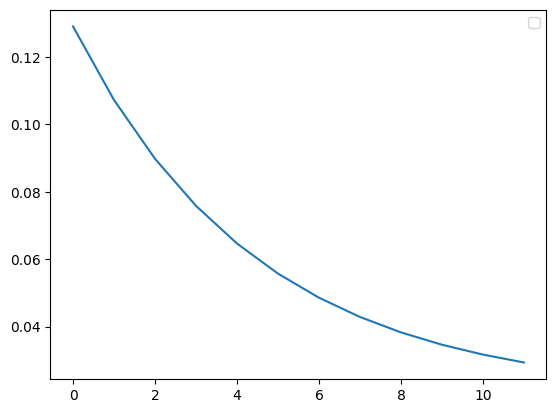

In [6]:
fig,ax = plt.subplots()
system.plot_expr(ax,d,expr='i_t-E_t[x_{t+1}]')
ax.legend()
fig.show()

In [31]:
t=1
dt = {k:v[t] for k,v in d.items()}

In [33]:
system.equations.static.calibrated[0].subs(dt)

Eq(i_{t}, -0.193533834586466)

### VAR

Shocks can also be specified by its full (unexpected) path realization.

\begin{align}
x_{t+1}&=ax_t+by_t+\epsilon_t\\
y_{t+1}&=cx_t+dy_t+\nu_t
\end{align}

System with 2 stable eigenvalues and 2 pre-determined variables.


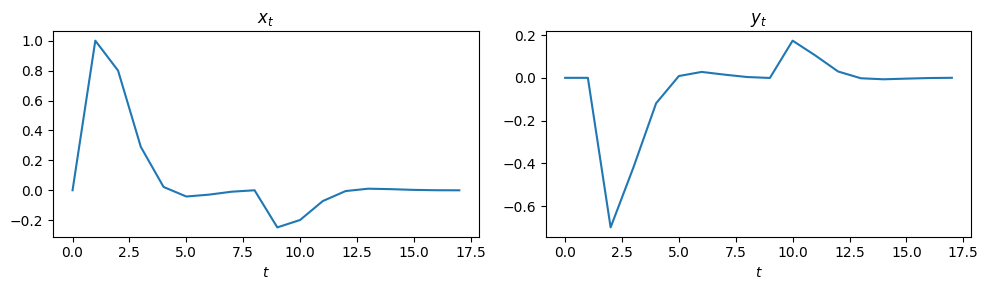

In [12]:
eq=[
    'x_{t+1}=a*x_{t}+b*y_{t}+eps_{t}',
    'y_{t+1}=c*x_{t}+d*y_{t}+nu_{t}'
]
calibration = {'a':0.8,'b':0.5,'c':-0.7,'d':-0.2}
system = Klein(eq, x='x_t,y_t', z='eps_t,nu_t', calibration=calibration)
x = system.simulate(x0=(0,0), z = {'eps_{t}':np.array([1,0,0,0,0,0,0,0,-0.25,0,0,0,0,0,0,0,0,0])})
x.plot('x_t, y_t')